The codes below are taking a lot of time to run. Howver, limiting the number of iterations takes a comparitively lesser time.

# 2.2

For 10 iterations

In [ ]:
import numpy as np
import time

def f(x):
    n = len(x)
    return sum(4*(x[i]**2 - x[i+1])**2 + (x[i] - 1)**2 for i in range(n-1))

def gradient_f(x):
    n = len(x)
    grad = np.zeros_like(x)

    grad[0] = 8*(x[0]**2 - x[1])*x[0] + 2*(x[0] - 1)

    for i in range(1, n-1):
        grad[i] = 8*(x[i]**2 - x[i+1])*x[i] + 2*(x[i] - 1) - 8*(x[i-1]**2 - x[i])*x[i-1]

    grad[n-1] = -8*(x[n-2]**2 - x[n-1])*x[n-2] + 2*(x[n-1] - 1)

    return grad

def backtracking_line_search(f, grad, x, p, alpha_0=0.9, rho=0.5, c=0.5):
    alpha = alpha_0
    while f(x + alpha * p) > f(x) + c * alpha * np.dot(grad, p):
        alpha *= rho
    return alpha

def bfgs_method(n, max_iter=10, tol=1e-3):
    x = np.zeros(n)
    B = np.eye(n)

    for k in range(max_iter):
        grad = gradient_f(x)

        if np.linalg.norm(grad) <= tol:
            break

        p = -np.linalg.solve(B, grad)

        alpha = backtracking_line_search(f, grad, x, p)

        x_new = x + alpha * p
        s = x_new - x
        y = gradient_f(x_new) - grad

        if np.dot(y, s) > 1e-10:
            rho = 1.0 / np.dot(y, s)
            B = B - rho * np.outer(s, y.T @ B) - rho * np.outer(B @ y, s.T) + rho * (1 + rho * np.dot(y.T @ B, y)) * np.outer(s, s)

        x = x_new

    return x, f(x), k+1

def main():
    sizes = [1000, 2500, 5000, 7500, 10000]

    print("n\t\tMinimizer\t\tMin Value\t\tIterations\t\tTime (s)")
    print("-" * 100)

    for n in sizes:
        start_time = time.time()
        minimizer, min_value, iterations = bfgs_method(n)
        end_time = time.time()

        print(f"{n}\t\t{minimizer[0]:.6f}\t\t{min_value:.6e}\t\t{iterations}\t\t\t{end_time-start_time:.4f}")

if __name__ == "__main__":
    main()

n		Minimizer		Min Value		Iterations		Time (s)
----------------------------------------------------------------------------------------------------
1000		1.039702		5.587028e-01		10			1.2842
2500		1.040361		1.107188e+00		10			8.0129
5000		1.054402		2.263876e+00		10			41.1593
7500		1.028442		2.845046e+00		10			128.7559
10000		1.008060		2.219115e+00		10			270.0316


# 2.3

For 10 iterations

In [ ]:
import numpy as np
import time
import scipy.linalg as la

def f(x):
    n = len(x)
    return sum(4*(x[i]**2 - x[i+1])**2 + (x[i] - 1)**2 for i in range(n-1))

def grad_f(x):
    n = len(x)
    g = np.zeros_like(x)

    g[0] = 8*(x[0]**2 - x[1])*x[0] + 2*(x[0] - 1)

    for i in range(1, n-1):
        g[i] = 8*(x[i]**2 - x[i+1])*x[i] + 2*(x[i] - 1) - 8*(x[i-1]**2 - x[i])*x[i-1]

    g[n-1] = -8*(x[n-2]**2 - x[n-1])*x[n-2] + 2*(x[n-1] - 1)

    return g

def hess_f(x):
    n = len(x)
    H = np.zeros((n, n))

    # Diagonal and adjacent diagonal elements
    for i in range(n-1):
        # Diagonal elements
        if i == 0:
            H[i,i] = 8*(3*x[0]**2 - x[1]) + 2
            H[i,i+1] = H[i+1,i] = -8*x[0]*x[1]
        elif i == n-2:
            H[i,i] = 8*(3*x[i]**2 - x[i+1]) + 2 - 8*(x[i-1]**2 - x[i])
            H[i,i+1] = H[i+1,i] = -8*x[i]*x[i+1]
        else:
            H[i,i] = 8*(3*x[i]**2 - x[i+1]) + 2 - 8*(x[i-1]**2 - x[i])
            H[i,i+1] = H[i+1,i] = -8*x[i]*x[i+1]

    # Last diagonal element
    H[n-1,n-1] = -8*(x[n-2]**2 - x[n-1]) + 2

    return H

def line_search(f, g, x, p, a0=0.9, rho=0.5, c=0.5):
    a = a0
    while f(x + a*p) > f(x) + c*a*np.dot(g, p):
        a *= rho
    return a

def newton_method(n, max_iter=10, tol=1e-5):
    x = np.zeros(n)

    for k in range(max_iter):
        g = grad_f(x)

        if np.linalg.norm(g) <= tol:
            break

        H = hess_f(x)

        try:
            p = -la.solve(H, g, assume_a='sym')
        except:
            p = -g  # Fallback to steepest descent

        a = line_search(f, g, x, p)
        x += a * p

    return x, f(x), k+1

def main():
    sizes = [1000, 2500, 5000, 7500, 10000]

    print("n\t\tMinimizer\t\tMin Value\t\tIterations\t\tTime (s)")
    print("-" * 100)

    for n in sizes:
        start = time.time()
        minimizer, min_val, iters = newton_method(n)
        end = time.time()

        print(f"{n}\t\t{minimizer[0]:.6f}\t\t{min_val:.6e}\t\t{iters}\t\t\t{end-start:.4f}")

if __name__ == "__main__":
    main()

n		Minimizer		Min Value		Iterations		Time (s)
----------------------------------------------------------------------------------------------------
1000		1.000027		2.304965e-01		10			1.2361
2500		1.000027		2.304965e-01		10			15.5564
5000		1.000027		2.304965e-01		10			151.1175
7500		1.000027		2.304965e-01		10			849.7382


For 50 iterations

In [ ]:
import numpy as np
import time
import scipy.linalg as la

def f(x):
    n = len(x)
    return sum(4*(x[i]**2 - x[i+1])**2 + (x[i] - 1)**2 for i in range(n-1))

def grad_f(x):
    n = len(x)
    g = np.zeros_like(x)

    g[0] = 8*(x[0]**2 - x[1])*x[0] + 2*(x[0] - 1)

    for i in range(1, n-1):
        g[i] = 8*(x[i]**2 - x[i+1])*x[i] + 2*(x[i] - 1) - 8*(x[i-1]**2 - x[i])*x[i-1]

    g[n-1] = -8*(x[n-2]**2 - x[n-1])*x[n-2] + 2*(x[n-1] - 1)

    return g

def hess_f(x):
    n = len(x)
    H = np.zeros((n, n))

    # Diagonal and adjacent diagonal elements
    for i in range(n-1):
        # Diagonal elements
        if i == 0:
            H[i,i] = 8*(3*x[0]**2 - x[1]) + 2
            H[i,i+1] = H[i+1,i] = -8*x[0]*x[1]
        elif i == n-2:
            H[i,i] = 8*(3*x[i]**2 - x[i+1]) + 2 - 8*(x[i-1]**2 - x[i])
            H[i,i+1] = H[i+1,i] = -8*x[i]*x[i+1]
        else:
            H[i,i] = 8*(3*x[i]**2 - x[i+1]) + 2 - 8*(x[i-1]**2 - x[i])
            H[i,i+1] = H[i+1,i] = -8*x[i]*x[i+1]

    # Last diagonal element
    H[n-1,n-1] = -8*(x[n-2]**2 - x[n-1]) + 2

    return H

def line_search(f, g, x, p, a0=0.9, rho=0.5, c=0.5):
    a = a0
    while f(x + a*p) > f(x) + c*a*np.dot(g, p):
        a *= rho
    return a

def newton_method(n, max_iter=50, tol=1e-5):
    x = np.zeros(n)

    for k in range(max_iter):
        g = grad_f(x)

        if np.linalg.norm(g) <= tol:
            break

        H = hess_f(x)

        try:
            p = -la.solve(H, g, assume_a='sym')
        except:
            p = -g  # Fallback to steepest descent

        a = line_search(f, g, x, p)
        x += a * p

    return x, f(x), k+1

def main():
    sizes = [1000, 2500, 5000, 7500, 10000]

    print("n\t\tMinimizer\t\tMin Value\t\tIterations\t\tTime (s)")
    print("-" * 100)

    for n in sizes:
        start = time.time()
        minimizer, min_val, iters = newton_method(n)
        end = time.time()

        print(f"{n}\t\t{minimizer[0]:.6f}\t\t{min_val:.6e}\t\t{iters}\t\t\t{end-start:.4f}")

if __name__ == "__main__":
    main()

n		Minimizer		Min Value		Iterations		Time (s)
----------------------------------------------------------------------------------------------------
1000		1.000000		3.845030e+00		50			6.2834
2500		1.000000		3.845030e+00		50			73.1378
5000		1.000000		3.845030e+00		50			733.7624


# 2.4

taking too much time to give output, running for long time disconnects the runtime in between.
this is for 10 iterations

n		Steepest Descent		BFGS
--------------------------------------------------
1000		0.3178 s		2.6478 s
2500		1.6535 s		20.5409 s
5000		1.6900 s		51.5527 s
7500		1.0058 s		136.6590 s
10000		1.3294 s		299.8345 s


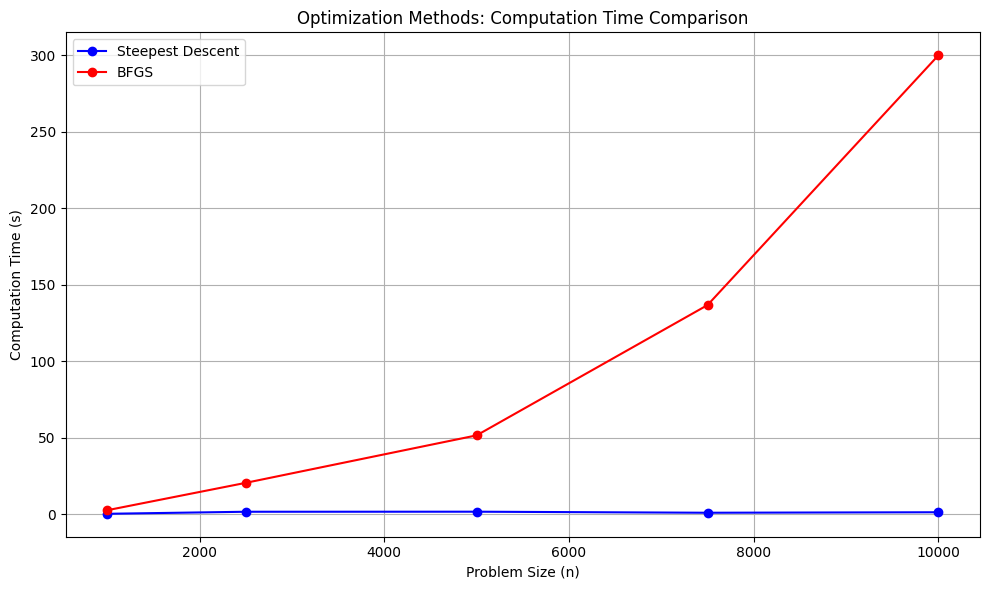

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

def f(x):
    n = len(x)
    return sum(4*(x[i]**2 - x[i+1])**2 + (x[i] - 1)**2 for i in range(n-1))

def gradient_f(x):
    n = len(x)
    grad = np.zeros_like(x)

    grad[0] = 8*(x[0]**2 - x[1])*x[0] + 2*(x[0] - 1)

    for i in range(1, n-1):
        grad[i] = 8*(x[i]**2 - x[i+1])*x[i] + 2*(x[i] - 1) - 8*(x[i-1]**2 - x[i])*x[i-1]

    grad[n-1] = -8*(x[n-2]**2 - x[n-1])*x[n-2] + 2*(x[n-1] - 1)

    return grad

def backtracking_line_search(f, grad, x, p, alpha_0=0.9, rho=0.5, c=0.5):
    alpha = alpha_0
    while f(x + alpha * p) > f(x) + c * alpha * np.dot(grad, p):
        alpha *= rho
    return alpha

def steepest_descent(n, max_iter=10, tol=1e-3):
    x = np.zeros(n)

    for k in range(max_iter):
        grad = gradient_f(x)

        if np.linalg.norm(grad) <= tol:
            break

        p = -grad
        alpha = backtracking_line_search(f, grad, x, p)
        x += alpha * p

    return x, f(x), k+1

def bfgs_method(n, max_iter=10, tol=1e-3):
    x = np.zeros(n)
    B = np.eye(n)

    for k in range(max_iter):
        grad = gradient_f(x)

        if np.linalg.norm(grad) <= tol:
            break

        p = -np.linalg.solve(B, grad)

        alpha = backtracking_line_search(f, grad, x, p)

        x_new = x + alpha * p
        s = x_new - x
        y = gradient_f(x_new) - grad

        if np.dot(y, s) > 1e-10:
            rho = 1.0 / np.dot(y, s)
            B = B - rho * np.outer(s, y.T @ B) - rho * np.outer(B @ y, s.T) + rho * (1 + rho * np.dot(y.T @ B, y)) * np.outer(s, s)

        x = x_new

    return x, f(x), k+1

def compare_methods():
    sizes = [1000, 2500, 5000, 7500, 10000]
    sd_times, bfgs_times = [], []

    print("n\t\tSteepest Descent\t\tBFGS")
    print("-" * 50)

    for n in sizes:
        # Steepest Descent
        start = time.time()
        sd_result = steepest_descent(n)
        sd_time = time.time() - start
        sd_times.append(sd_time)

        # BFGS
        start = time.time()
        bfgs_result = bfgs_method(n)
        bfgs_time = time.time() - start
        bfgs_times.append(bfgs_time)

        print(f"{n}\t\t{sd_time:.4f} s\t\t{bfgs_time:.4f} s")

    # Plotting
    plt.figure(figsize=(10,6))
    plt.plot(sizes, sd_times, 'b-o', label='Steepest Descent')
    plt.plot(sizes, bfgs_times, 'r-o', label='BFGS')
    plt.xlabel('Problem Size (n)')
    plt.ylabel('Computation Time (s)')
    plt.title('Optimization Methods: Computation Time Comparison')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Run the comparison
compare_methods()